# MatX Radar Tutorial
This notebooks demonstrates MatX's ability to quickly prototype and implement a real-world workflow, using a radar pipeline as a representative taks. In this notebook we'll combine all of our learned skillsets in MatX to quickly implement a complex radar operation in a few simple lines.

## Radar Example Pipeline


### Pulse Compression Theory
Pulse compression is a signal processing technique commonly used by radar, sonar and echography to either increase the range resolution when pulse length is constrained or increase the signal to noise ratio when the peak power and the bandwidth (or equivalently range resolution) of the transmitted signal are constrained. This is achieved by modulating the transmitted pulse and then correlating the received signal with the transmitted pulse. 

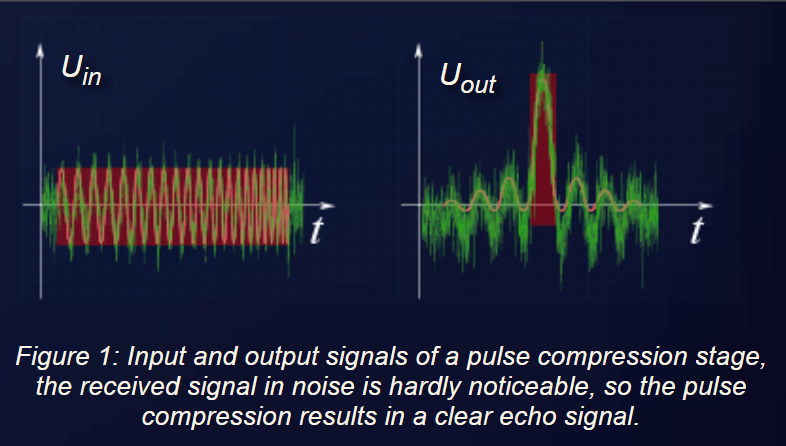


## Implementing Pulse Compression 
### Set of Operations to Perform

In [ ]:
// organize the incoming data and waveform
auto waveformPart = slice(waveformView, {0}, {waveformLength});
auto waveformT = waveformView.template Clone<3>({numChannels, numPulses, matxKeepDim});
auto waveformFull = slice(waveformView, {0}, {numSamplesRnd});

auto x = inputView;

// create waveform expression for this dwell
(waveformPart = waveformPart * hamming<0>({waveformLength})).run(exec);

// compute L2 norm
(norms = sum(abs2(waveformPart))).run(exec);
(norms = sqrt(norms)).run(exec);

(waveformPart = waveformPart / norms).run(exec);
(waveformFull = fft(waveformPart, numSamplesRnd)).run(exec);
(waveformFull = conj(waveformFull)).run(exec);

//FFT based convolution
(x = fft(x)).run(exec);
(x = x * waveformT).run(exec);
(x = ifft(x)).run(exec);

## Optimization of Pulse Compression